In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error


In [3]:
df=pd.read_excel(r"C:\Users\aksha\Downloads\Airlines+Data (1).xlsx",parse_dates=True)
df.index.freq='MS'

In [4]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


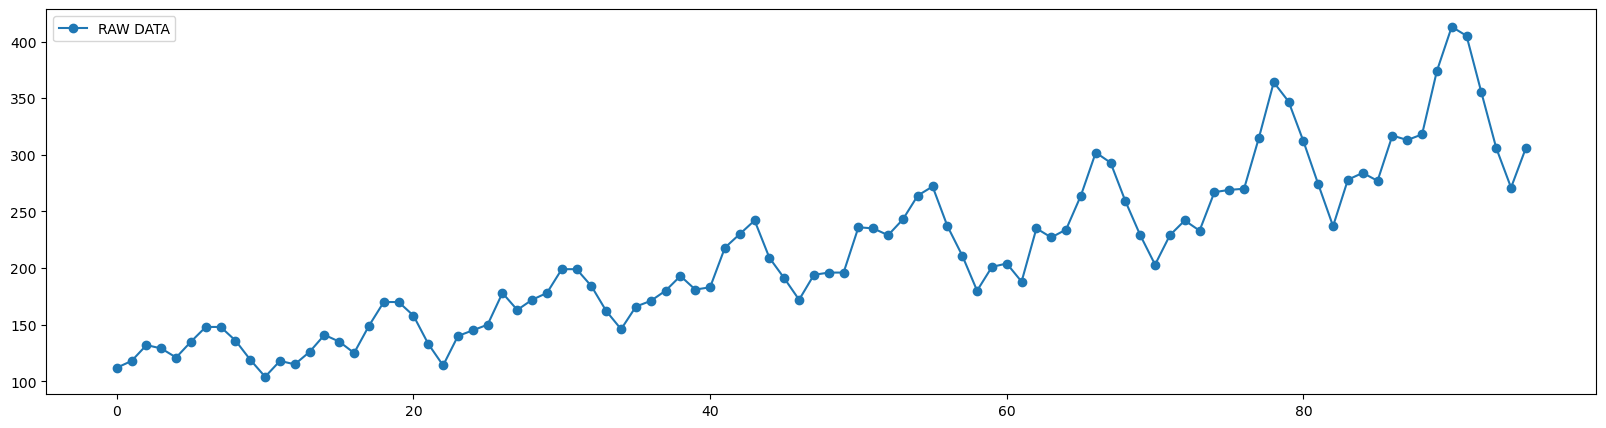

In [9]:
plt.figure(figsize=(20,5))
df['Passengers'].plot(label='RAW DATA',marker='o')
plt.legend()

<Axes: xlabel='Passengers', ylabel='Count'>

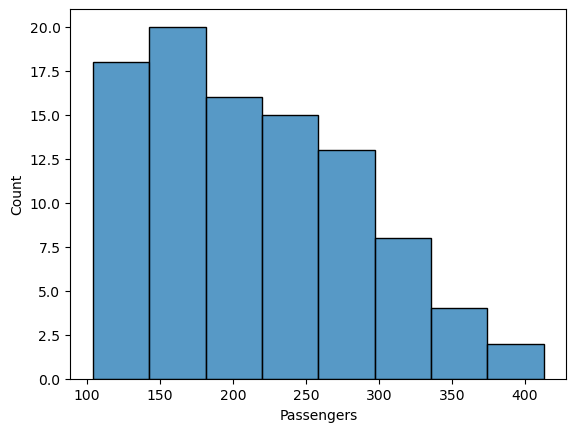

In [10]:
sns.histplot(df['Passengers'])

<Axes: xlabel='Passengers', ylabel='Density'>

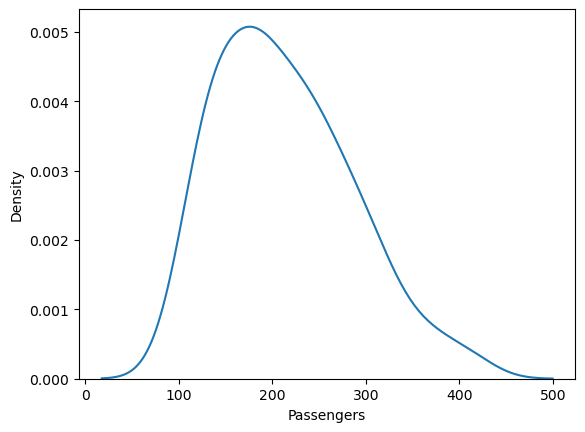

In [11]:
sns.kdeplot(df['Passengers'])

<Axes: >

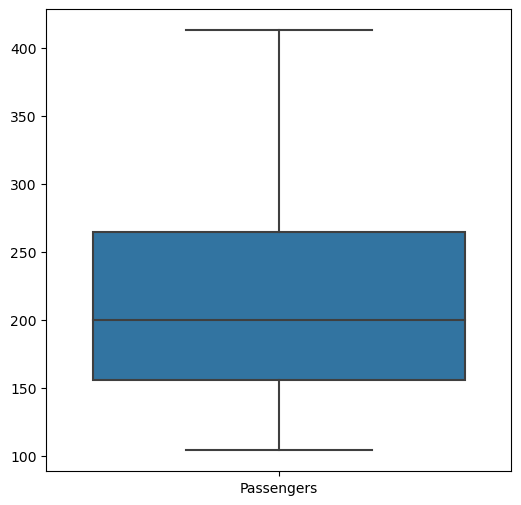

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(df)

In [13]:
dummie=pd.get_dummies(df['Month'])

In [14]:
df1=pd.concat([df,dummie],axis=1)
df1

,Month,Passengers,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00
0,1995-01-01,112,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### CREATING MODELS

In [15]:
train_len=int(len(df)*0.75)
test_len=int(len(df)*0.25)
print(train_len)
print(test_len)

72
24


In [61]:
train_data=df.iloc[:72]
test_data=df.iloc[72:]

In [17]:
train_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
67,2000-08-01,293
68,2000-09-01,259
69,2000-10-01,229
70,2000-11-01,203


In [62]:
test_data

,Month,Passengers
72,2001-01-01,242
73,2001-02-01,233
74,2001-03-01,267
75,2001-04-01,269
76,2001-05-01,270
77,2001-06-01,315
78,2001-07-01,364
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274


### DECOMPOSITION

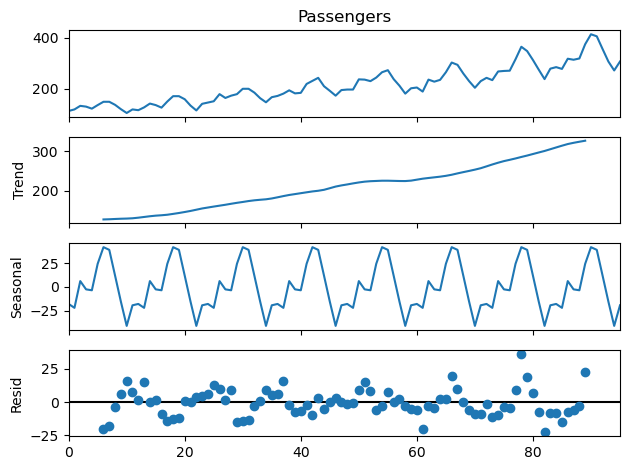

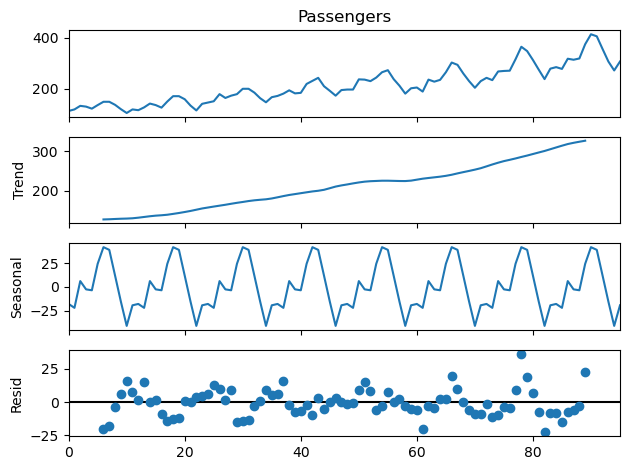

In [21]:
seasonal_decompose(df['Passengers'],period=12).plot()

### PACF AND ACF PLOTS

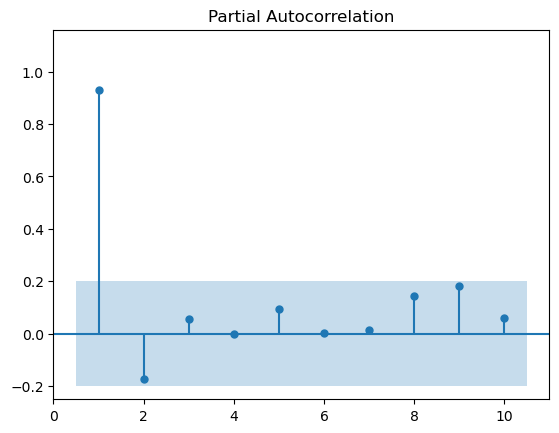

In [27]:
plot_pacf(df['Passengers'],lags=10,auto_ylims=True,zero=False)
plt.show()

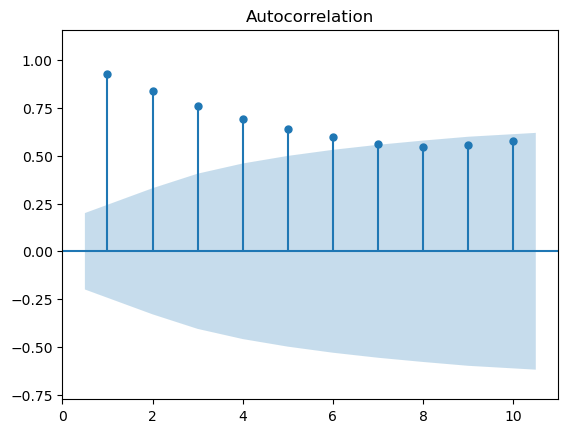

In [26]:
plot_acf(df['Passengers'],lags=10,auto_ylims=True,zero=False)
plt.show()

### MOVING AVERAGE

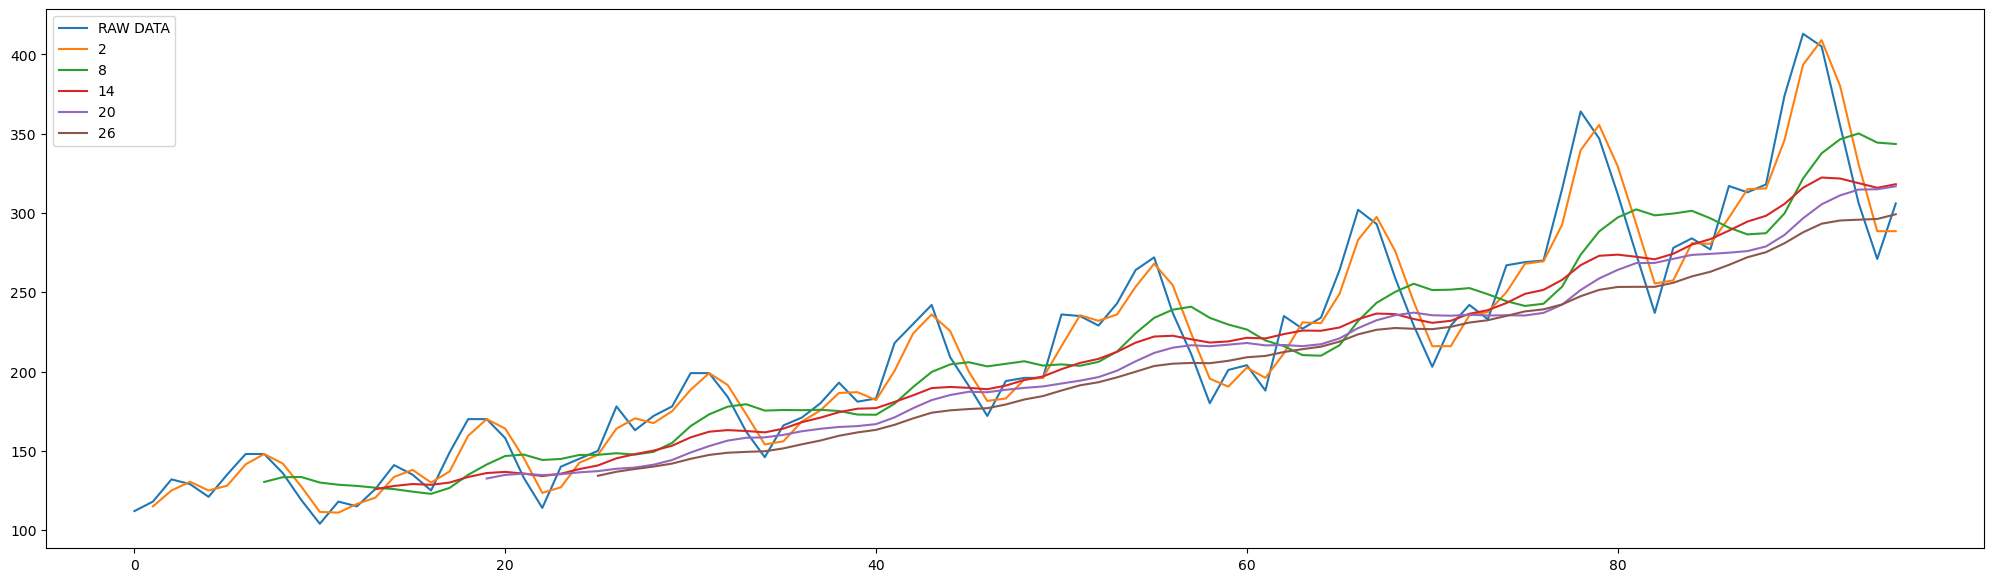

In [29]:
plt.figure(figsize=(25,7))
df['Passengers'].plot(label='RAW DATA')
for i in range(2,30,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i),)
plt.legend()
plt.show()

### SIMPLE EXPONENTIAL SMOOTHING

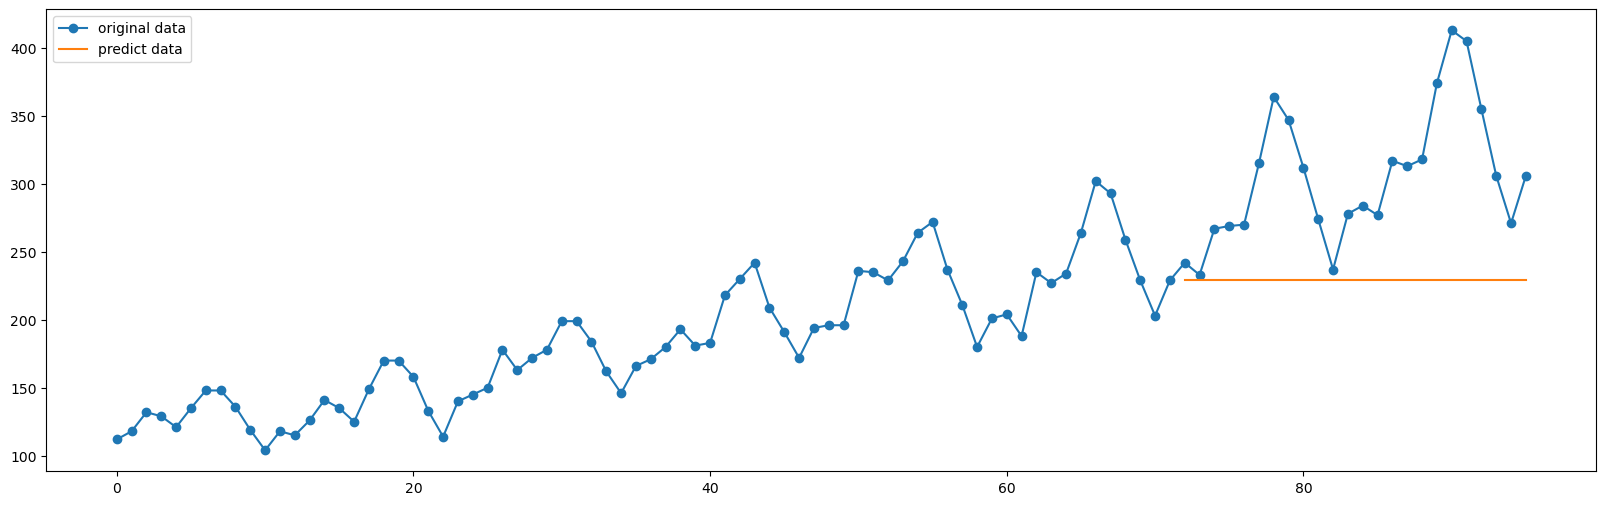

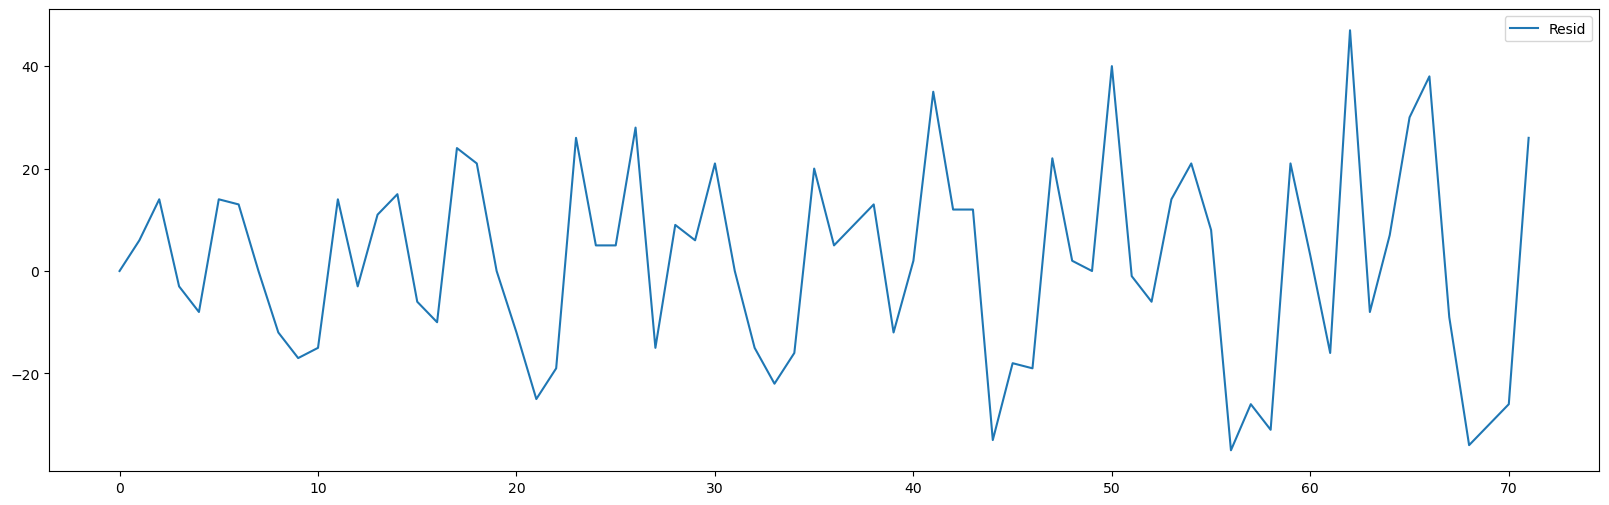

In [36]:
model_simple=SimpleExpSmoothing(train_data["Passengers"]).fit()
simple_test_predict=model_simple.predict(start=train_len,end=train_len+test_len-1)
mse_simple=mean_squared_error(test_data['Passengers'],simple_test_predict)
rmse_simple=np.sqrt(mse_simple)
mae_simple=mean_absolute_error(test_data['Passengers'],simple_test_predict)
mape_simple=mean_absolute_percentage_error(test_data['Passengers'],simple_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
simple_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_simple.resid.plot(label='Resid')
plt.legend()

### DOUBLE EXPONENTIAL SMOOTHING WITH MULTIPLICATIVE TREND

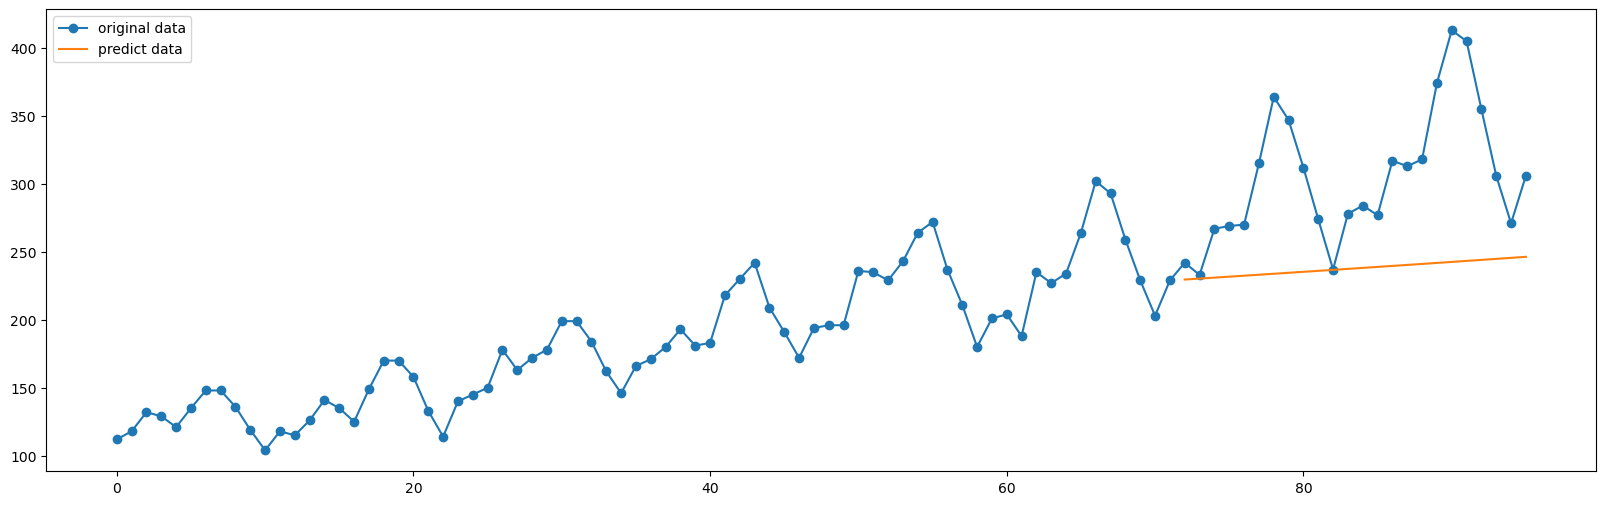

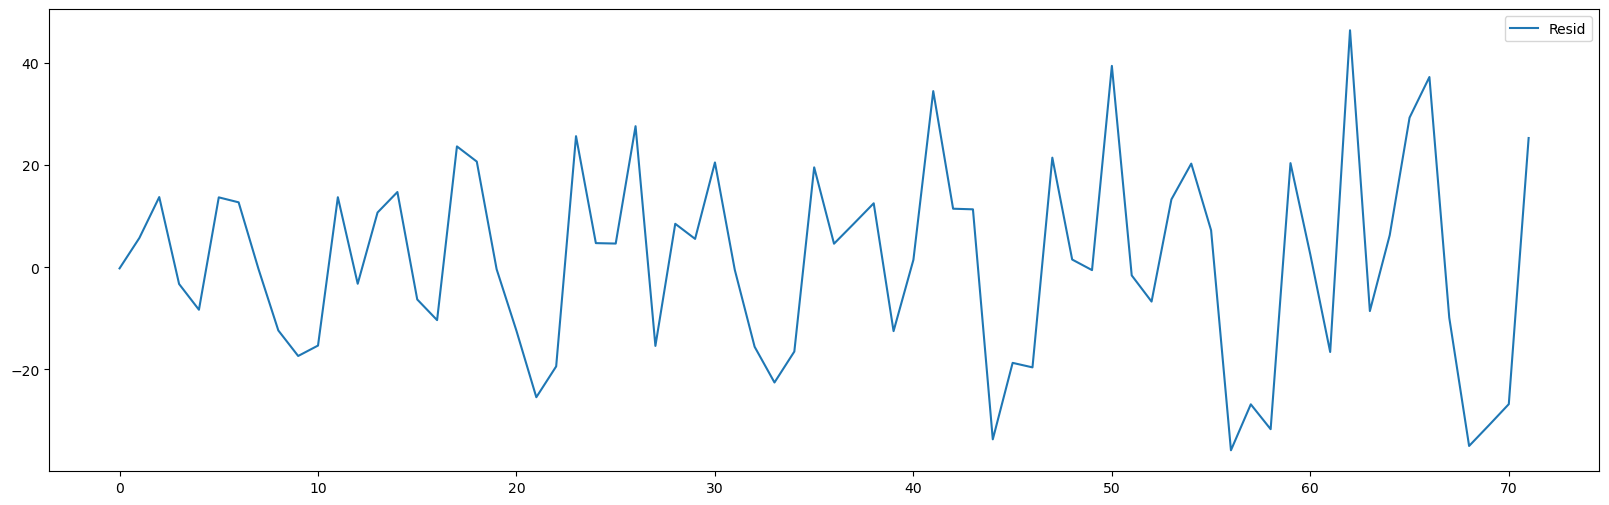

In [37]:
model_double=ExponentialSmoothing(train_data['Passengers'],trend='mul').fit()
double_mul_test_predict=model_double.predict(start=train_len,end=train_len+test_len-1)
mse_double_mul=mean_squared_error(test_data['Passengers'],double_mul_test_predict)
rmse_double_mul=np.sqrt(mse_double_mul)
mae_double_mul=mean_absolute_error(test_data['Passengers'],double_mul_test_predict)
mape_double_mul=mean_absolute_percentage_error(test_data['Passengers'],double_mul_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
double_mul_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_double.resid.plot(label='Resid')
plt.legend()

### DOUBLE EXPONENTIAL SMOOTHING WITH ADDITIVE TREND

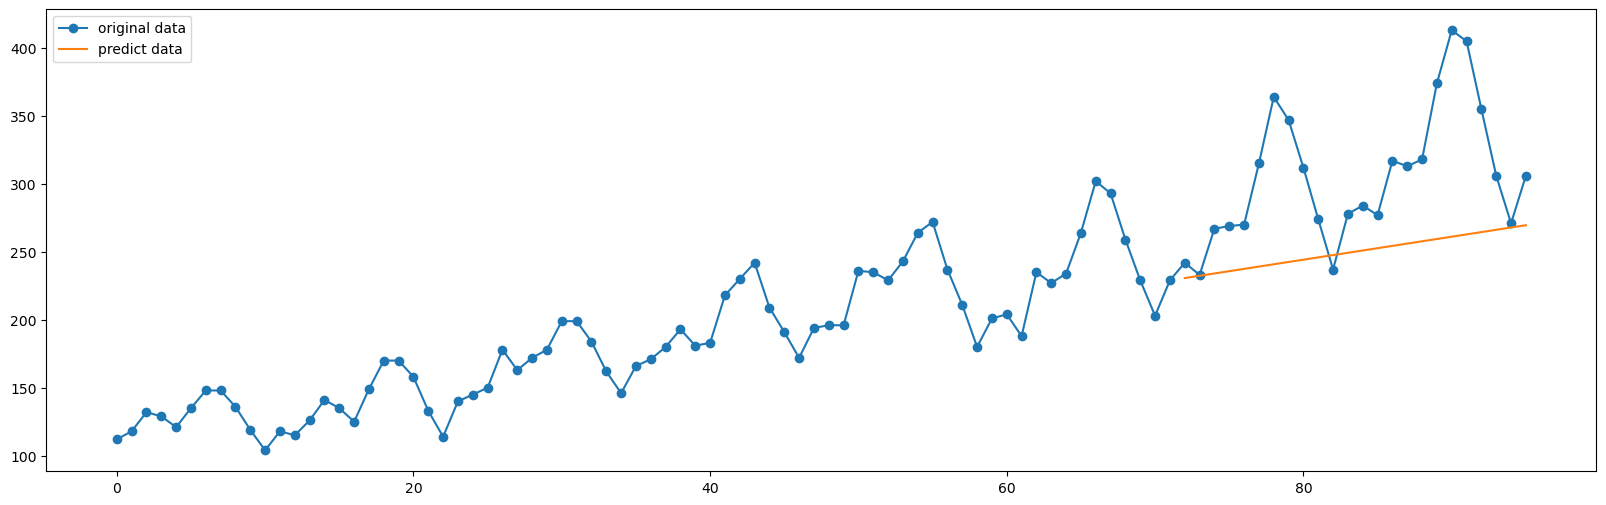

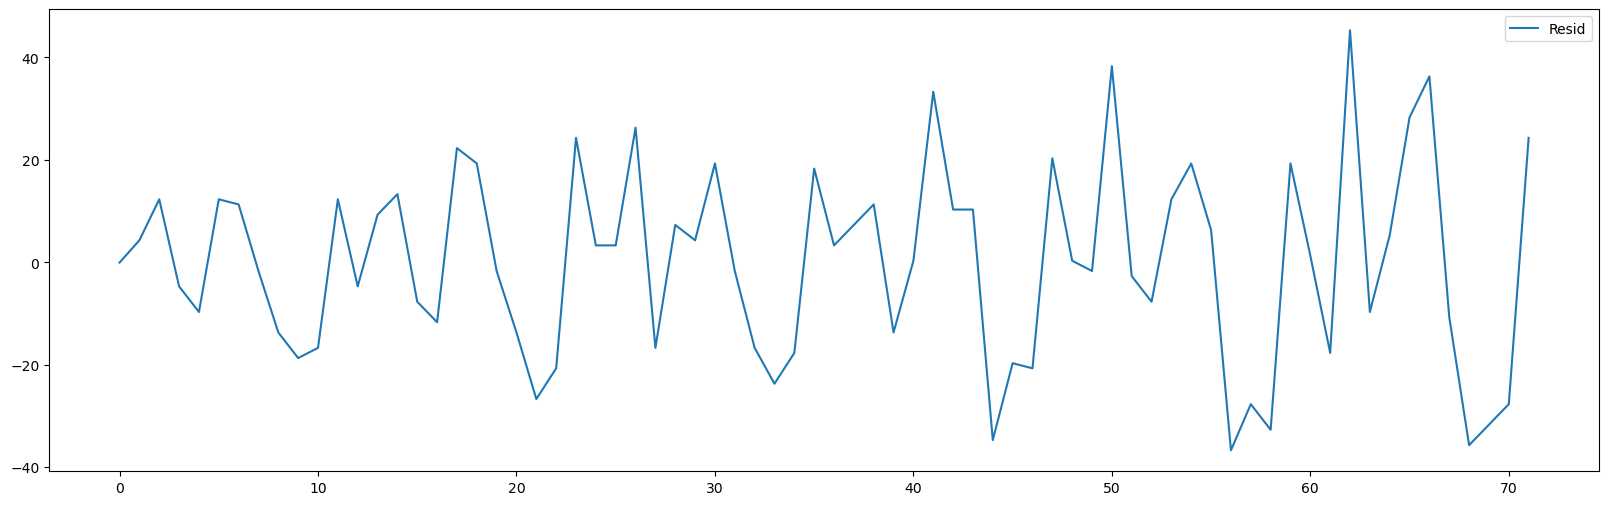

In [38]:
model_double1=ExponentialSmoothing(train_data['Passengers'],trend='add').fit()
double1_add_test_predict=model_double1.predict(start=train_len,end=train_len+test_len-1)
mse_double1_add=mean_squared_error(test_data['Passengers'],double1_add_test_predict)
rmse_double1_add=np.sqrt(mse_double1_add)
mae_double1_add=mean_absolute_error(test_data['Passengers'],double1_add_test_predict)
mape_double1_add=mean_absolute_percentage_error(test_data['Passengers'],double1_add_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
double1_add_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_double1.resid.plot(label='Resid')
plt.legend()

### TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY AND TREND=MUL

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


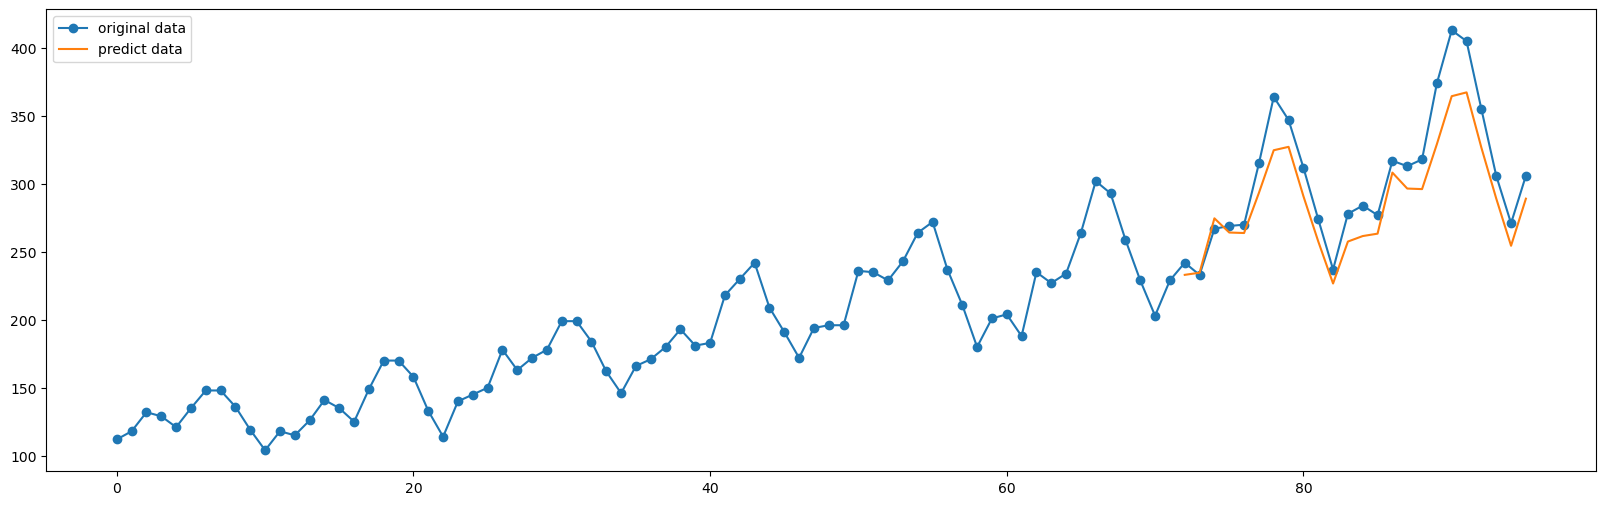

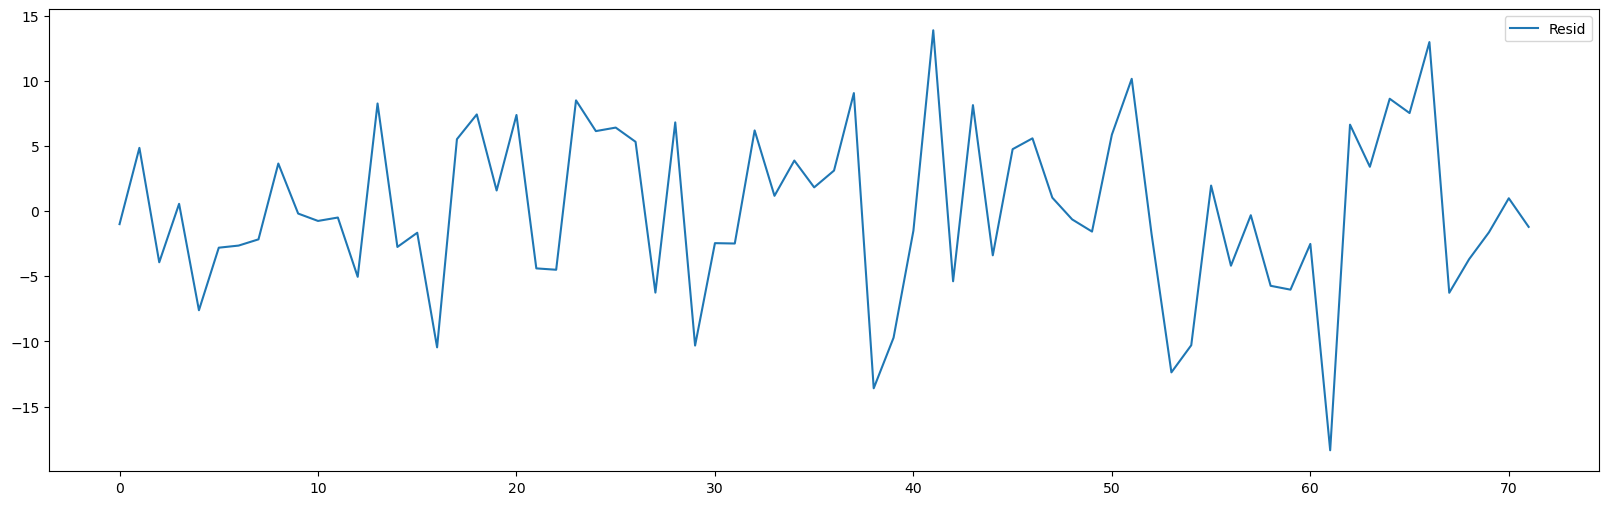

In [39]:
model_triple1=ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
triple1_test_predict=model_triple1.predict(start=train_len,end=train_len+test_len-1)
mse_triple1=mean_squared_error(test_data['Passengers'],triple1_test_predict)
rmse_triple1=np.sqrt(mse_triple1)
mae_triple1=mean_absolute_error(test_data['Passengers'],triple1_test_predict)
mape_triple1=mean_absolute_percentage_error(test_data['Passengers'],triple1_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
triple1_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_triple1.resid.plot(label='Resid')
plt.legend()

### TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY AND TREND=ADD

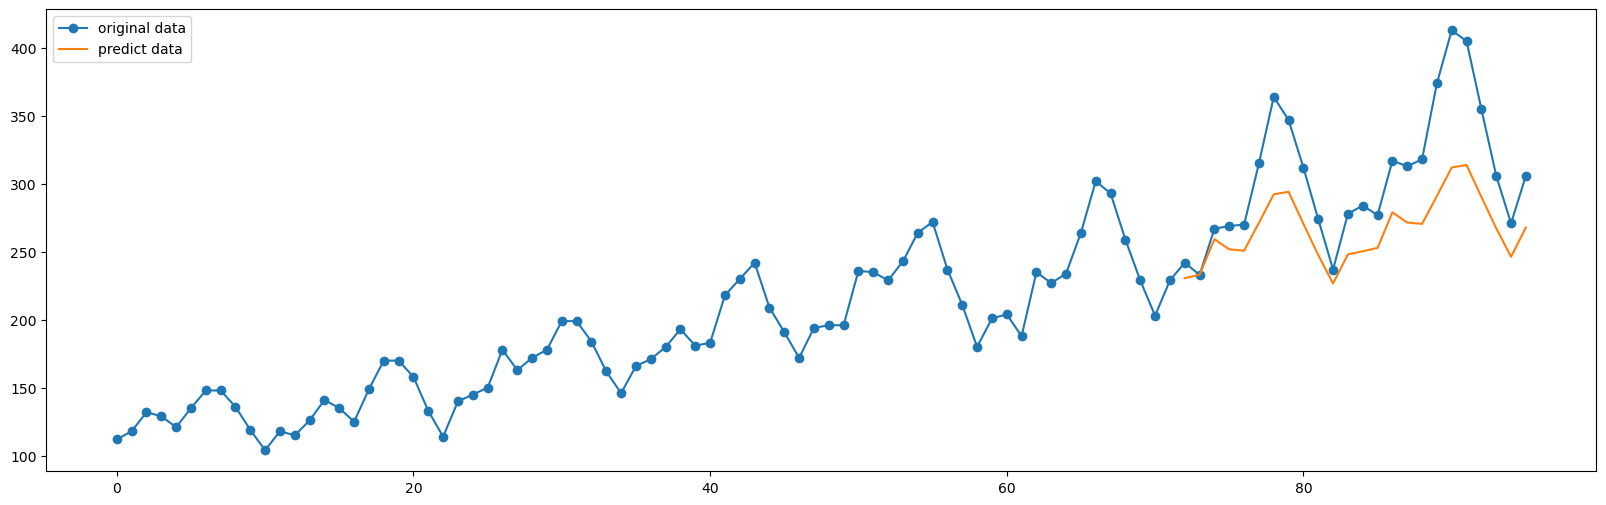

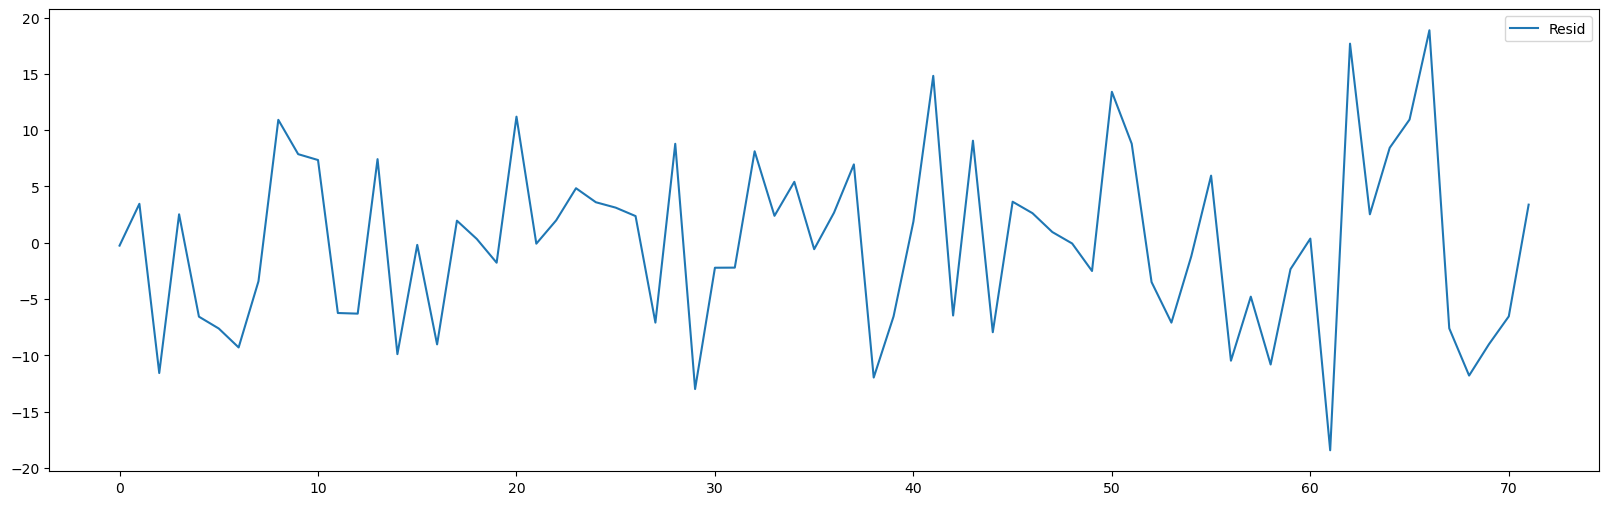

In [40]:
model_triple2=ExponentialSmoothing(train_data['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
triple2_test_predict=model_triple2.predict(start=train_len,end=train_len+test_len-1)
mse_triple2=mean_squared_error(test_data['Passengers'],triple2_test_predict)
rmse_triple2=np.sqrt(mse_triple2)
mae_triple2=mean_absolute_error(test_data['Passengers'],triple2_test_predict)
mape_triple2=mean_absolute_percentage_error(test_data['Passengers'],triple2_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
triple2_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_triple2.resid.plot(label='Resid')
plt.legend()

### TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY =MUL AND TREND =ADD

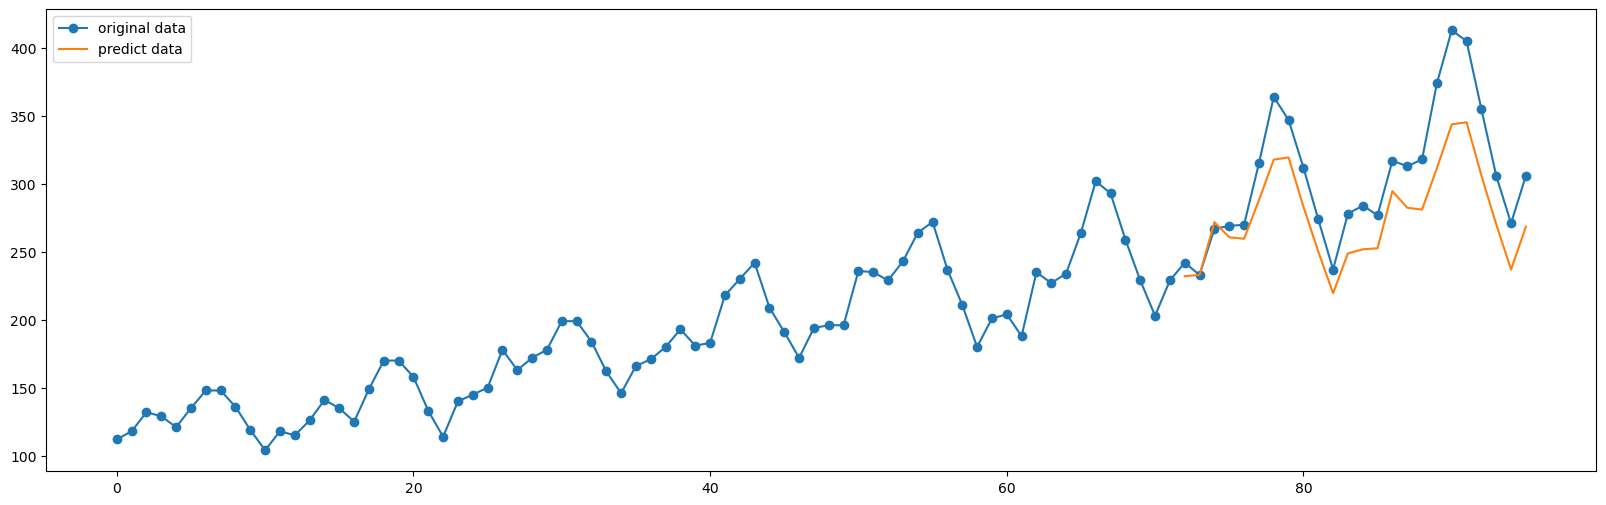

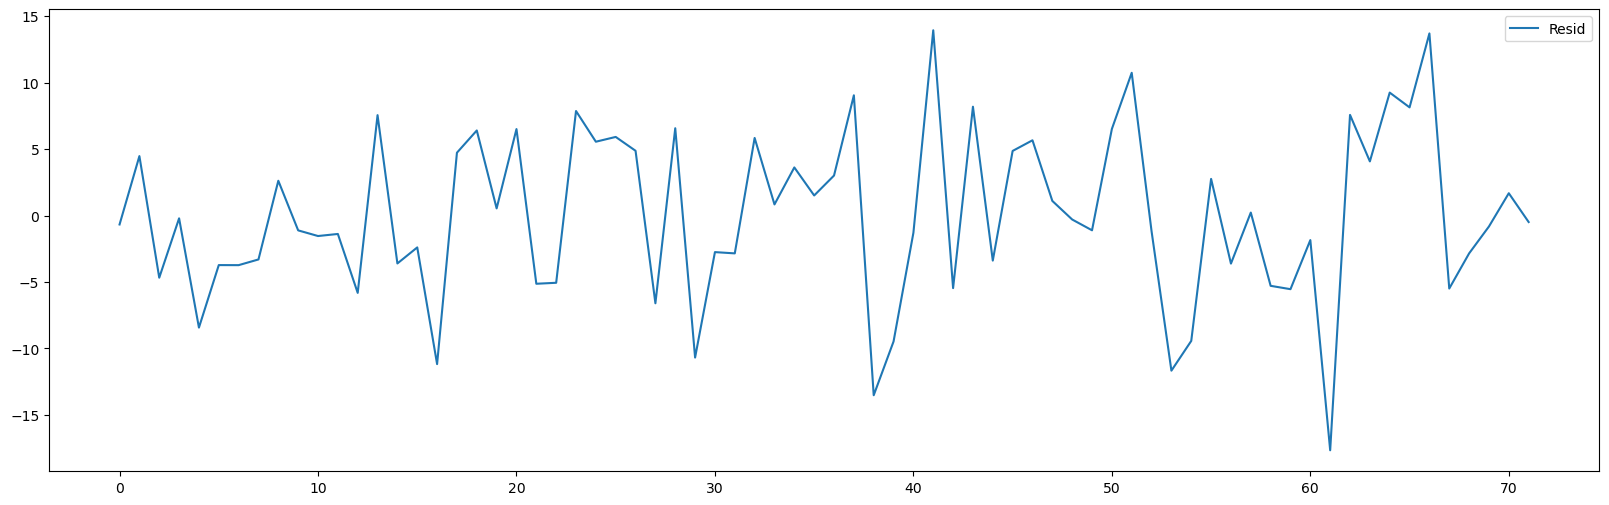

In [41]:
model_triple3=ExponentialSmoothing(train_data['Passengers'],trend='add',seasonal='mul',seasonal_periods=12).fit()
triple3_test_predict=model_triple3.predict(start=train_len,end=train_len+test_len-1)
mse_triple3=mean_squared_error(test_data['Passengers'],triple3_test_predict)
rmse_triple3=np.sqrt(mse_triple3)
mae_triple3=mean_absolute_error(test_data['Passengers'],triple3_test_predict)
mape_triple3=mean_absolute_percentage_error(test_data['Passengers'],triple3_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
triple3_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_triple3.resid.plot(label='Resid')
plt.legend()

### TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY =ADD AND TREND =MUL

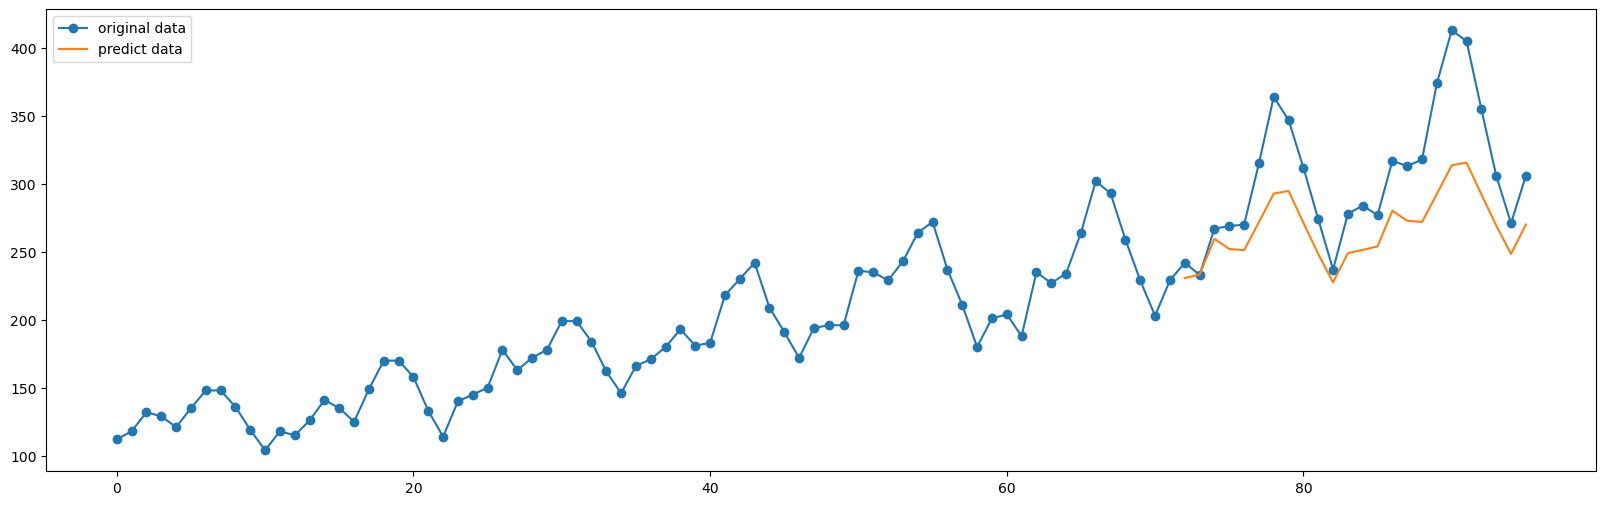

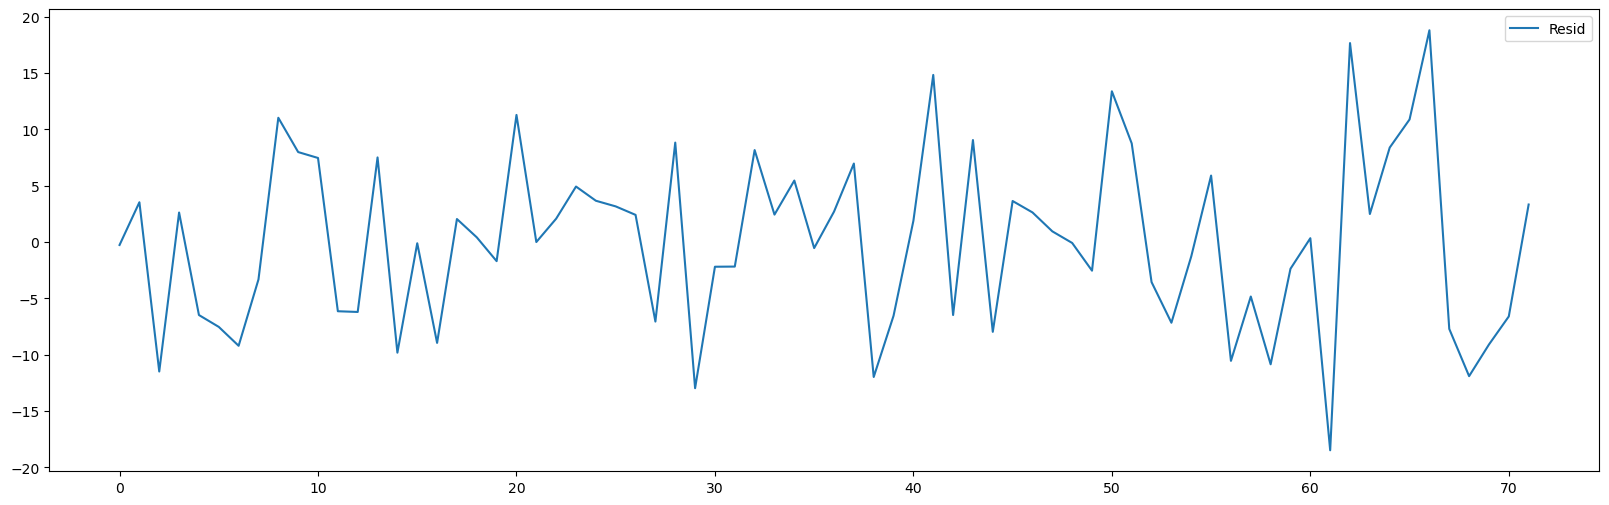

In [42]:
model_triple4=ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit()
triple4_test_predict=model_triple4.predict(start=train_len,end=train_len+test_len-1)
mse_triple4=mean_squared_error(test_data['Passengers'],triple4_test_predict)
rmse_triple4=np.sqrt(mse_triple4)
mae_triple4=mean_absolute_error(test_data['Passengers'],triple4_test_predict)
mape_triple4=mean_absolute_percentage_error(test_data['Passengers'],triple4_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
triple4_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_triple4.resid.plot(label='Resid')
plt.legend()

### FINDIG P,I,Q VALUES

In [58]:
def testi_data(data):
    if adfuller(data)[1] > 0.05:
        print('fail to reject null hypothesis:data is not stationarity')
    else:
        print('reject null hypothesis: data is stationary')
    

In [59]:
testi_data(df['Passengers'])

fail to reject null hypothesis:data is not stationarity


In [53]:
auto_model=auto_arima(df['Passengers'],start_p=0,start_q=0,max_p=8,max_q=8,trace=True,seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=871.345, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=867.283, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=863.757, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=870.076, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=862.193, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=861.773, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=860.702, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=862.251, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=855.919, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=860.821, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=856.719, Time=0.08 se

In [54]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -421.170
Date:                Sat, 27 Jan 2024   AIC                            854.341
Time:                        13:23:38   BIC                            869.664
Sample:                             0   HQIC                           860.533
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1526      0.142      1.071      0.284      -0.127       0.432
ar.L2          0.4062      0.144      2.815      0.005       0.123       0.689
ar.L3         -0.3167      0.121     -2.619      0.009      -0.554      -0.080
ma.L1          0.1470      0.121      1.215      0.224      -0.090       0.384
ma.L2         -0.7809      0.116     -6.734      0.000      -1.008      -0.554
sigma2       409.9286     75.390      5.437      0.000     262.167     557.690
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.41   Prob(JB):                         0.14
Heteroskedasticity (H):               3.63   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### P,I,Q VALUE=3,1,2

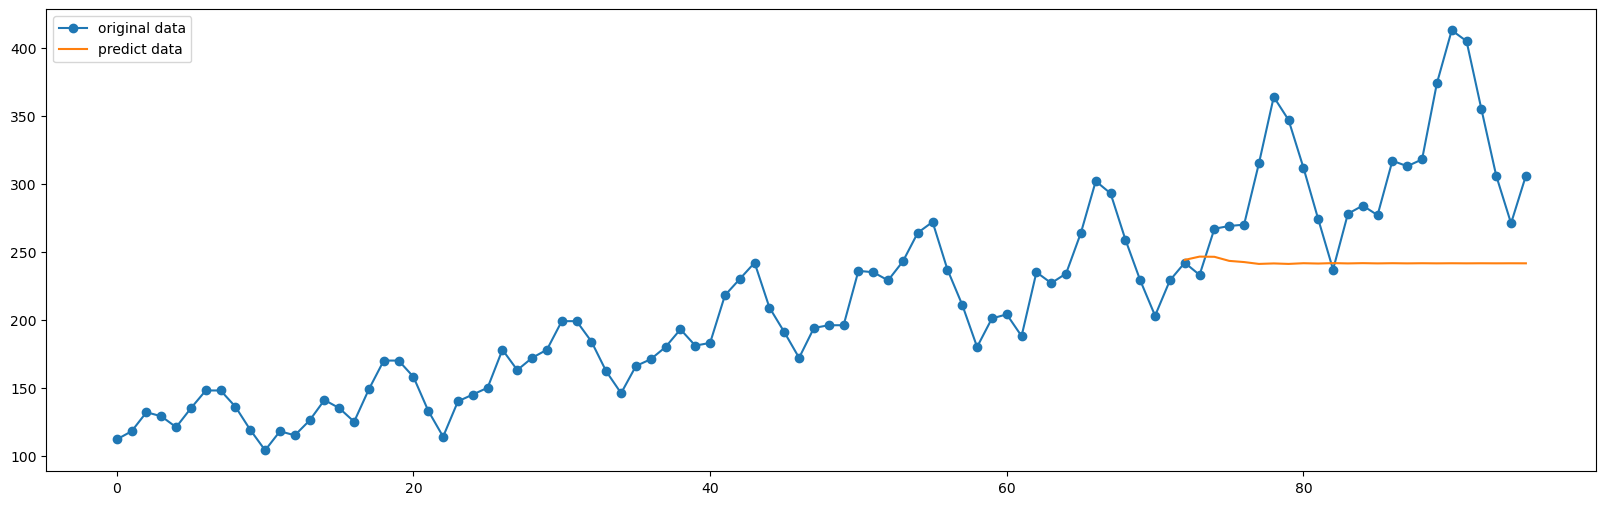

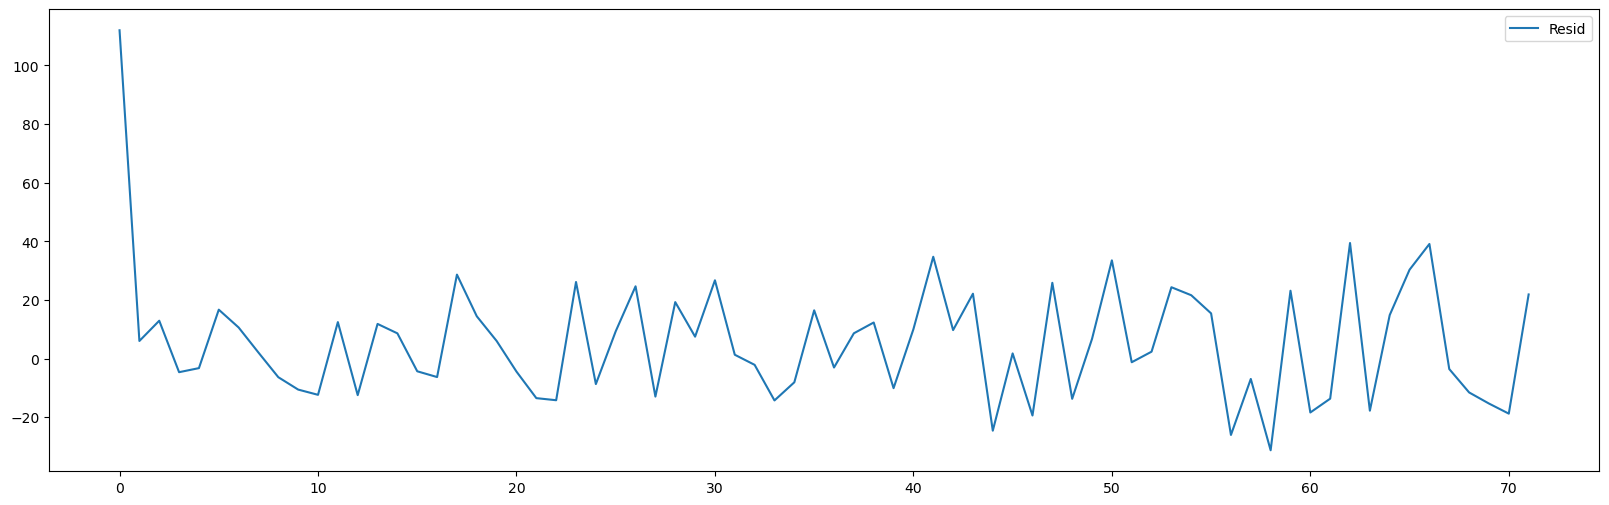

In [63]:
model_arima=ARIMA(train_data['Passengers'],order=(3,1,2)).fit()
arima_test_predict=model_arima.predict(start=train_len,end=train_len+test_len-1)
mse_arima=mean_squared_error(test_data['Passengers'],arima_test_predict)
rmse_arima=np.sqrt(mse_arima)
mae_arima=mean_absolute_error(test_data['Passengers'],arima_test_predict)
mape_arima=mean_absolute_percentage_error(test_data['Passengers'],arima_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
arima_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_arima.resid.plot(label='Resid')
plt.legend()

In [65]:
df1['t']=np.arange(0,96)

In [69]:
df1['t_squared']=np.square(df1['t'])

In [70]:
df1['log_Passengers']=np.log(df1['Passengers'])

In [74]:
train=df1.iloc[:72]
test=df1.iloc[72:]

### LINEAR MODEL

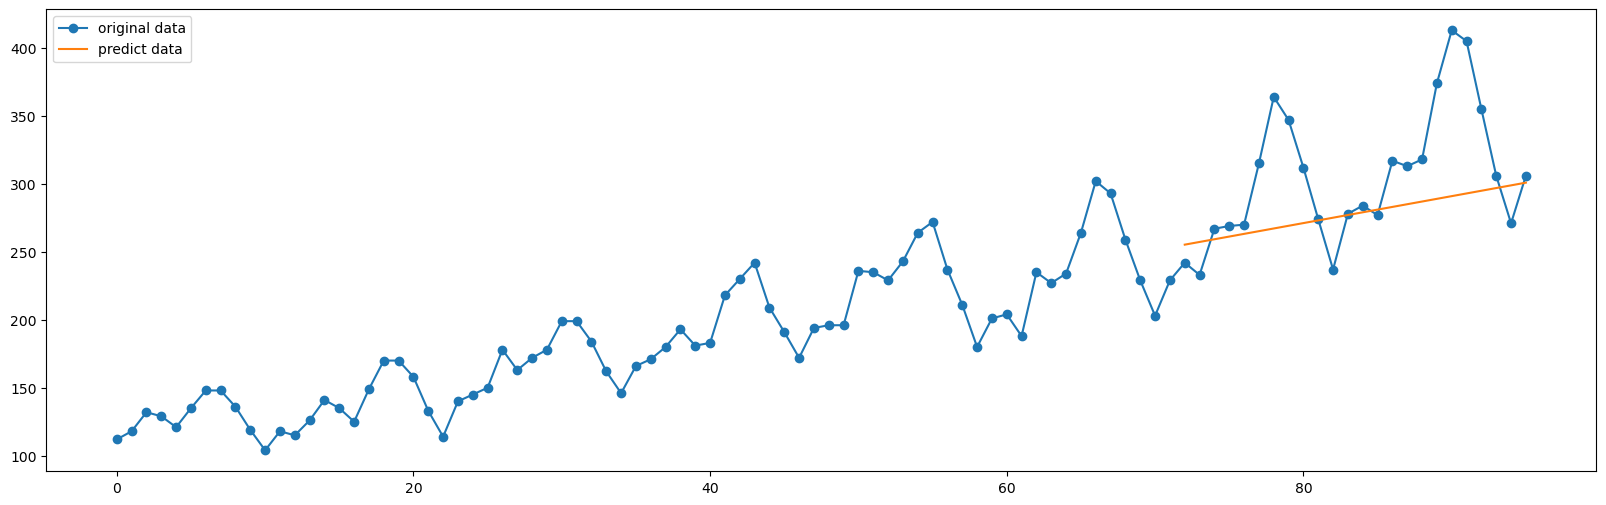

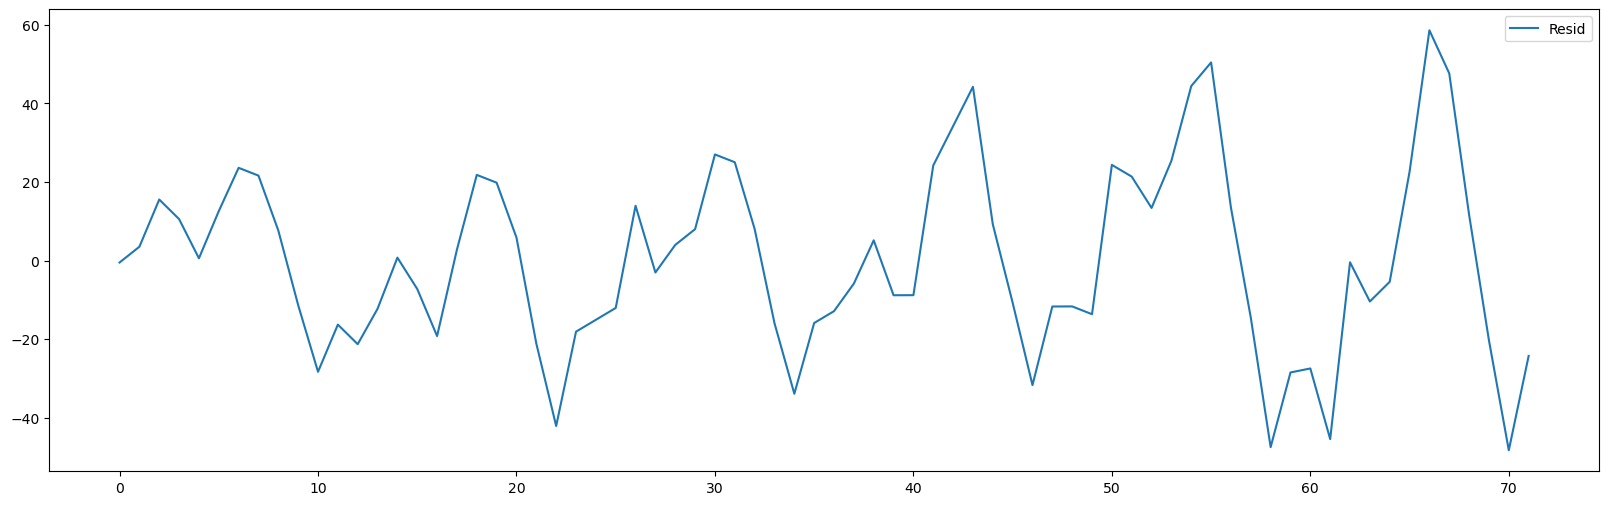

In [75]:
model_linear=smf.ols('Passengers~t',data=train).fit()
linear_test_predict=pd.Series(model_linear.predict(pd.DataFrame(test['t'])))
mse_linear=mean_squared_error(test['Passengers'],linear_test_predict)
rmse_linear=np.sqrt(mse_linear)
mae_linear=mean_absolute_error(test['Passengers'],linear_test_predict)
mape_linear=mean_absolute_percentage_error(test['Passengers'],linear_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
linear_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_linear.resid.plot(label='Resid')
plt.legend()

### EXPONENTIAL MODEL

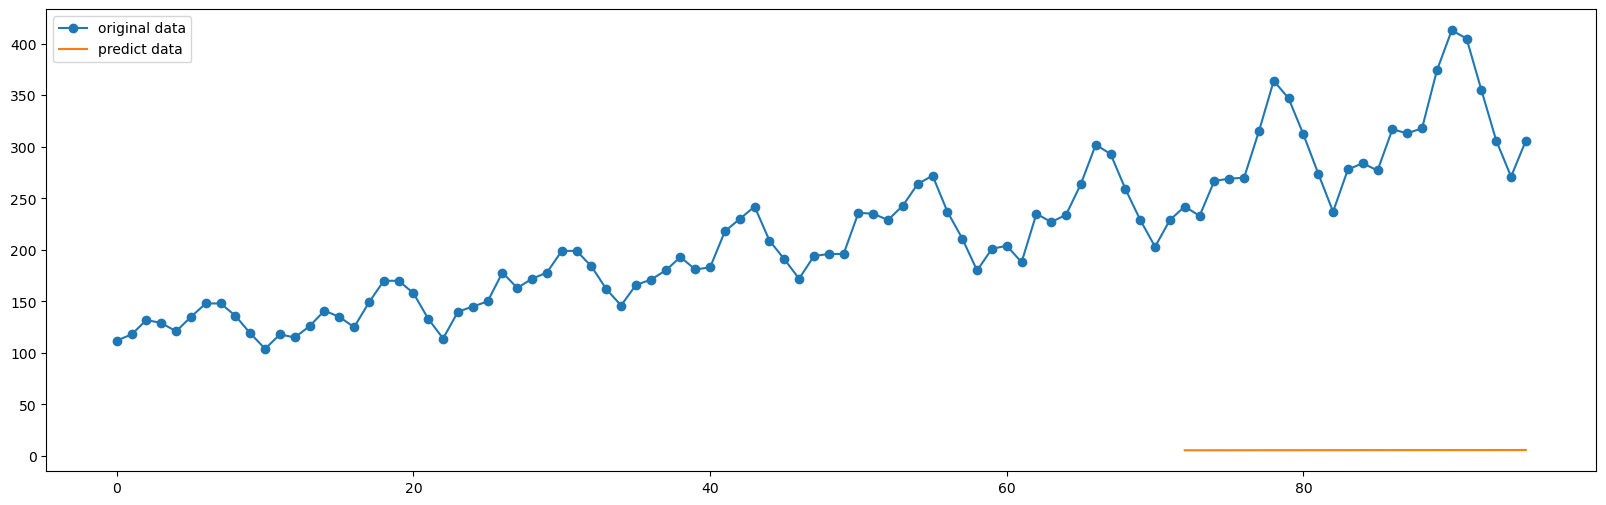

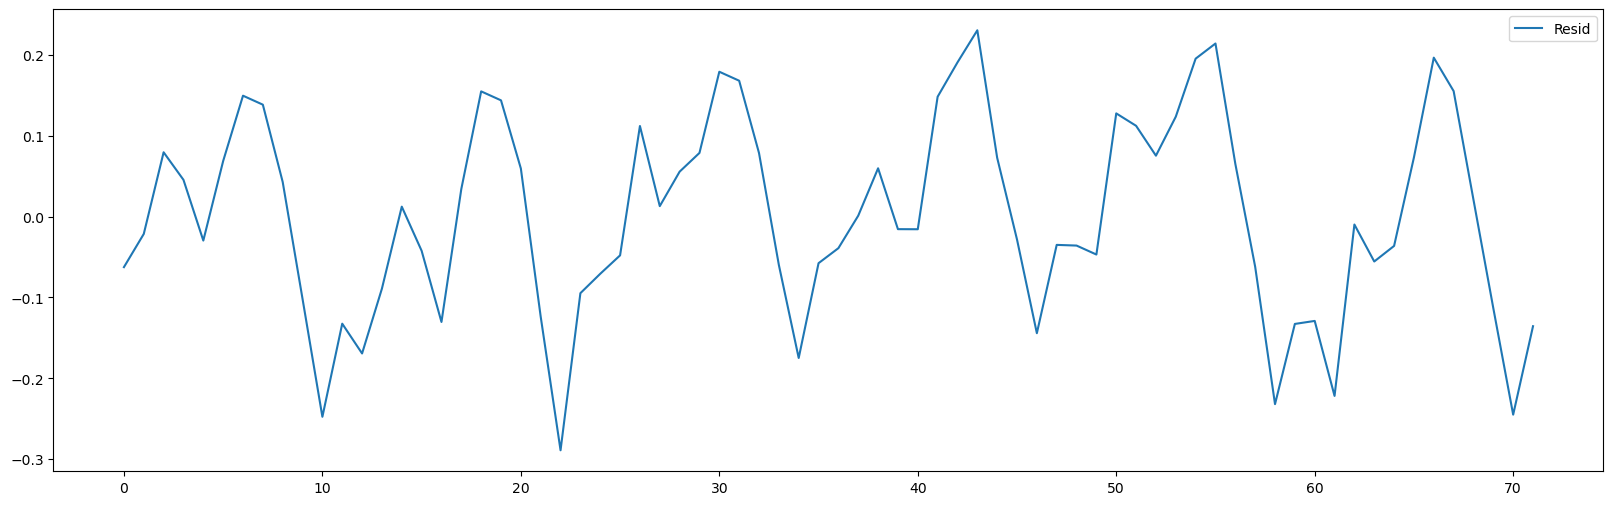

In [77]:
model_exp=smf.ols('log_Passengers~t',data=train).fit()
exp_test_predict=pd.Series(model_exp.predict(pd.DataFrame(test['t'])))
mse_exp=mean_squared_error(test['Passengers'],exp_test_predict)
rmse_exp=np.sqrt(mse_exp)
mae_exp=mean_absolute_error(test['Passengers'],exp_test_predict)
mape_exp=mean_absolute_percentage_error(test['Passengers'],exp_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
exp_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_exp.resid.plot(label='Resid')
plt.legend()

### QUADRATIC MODEL

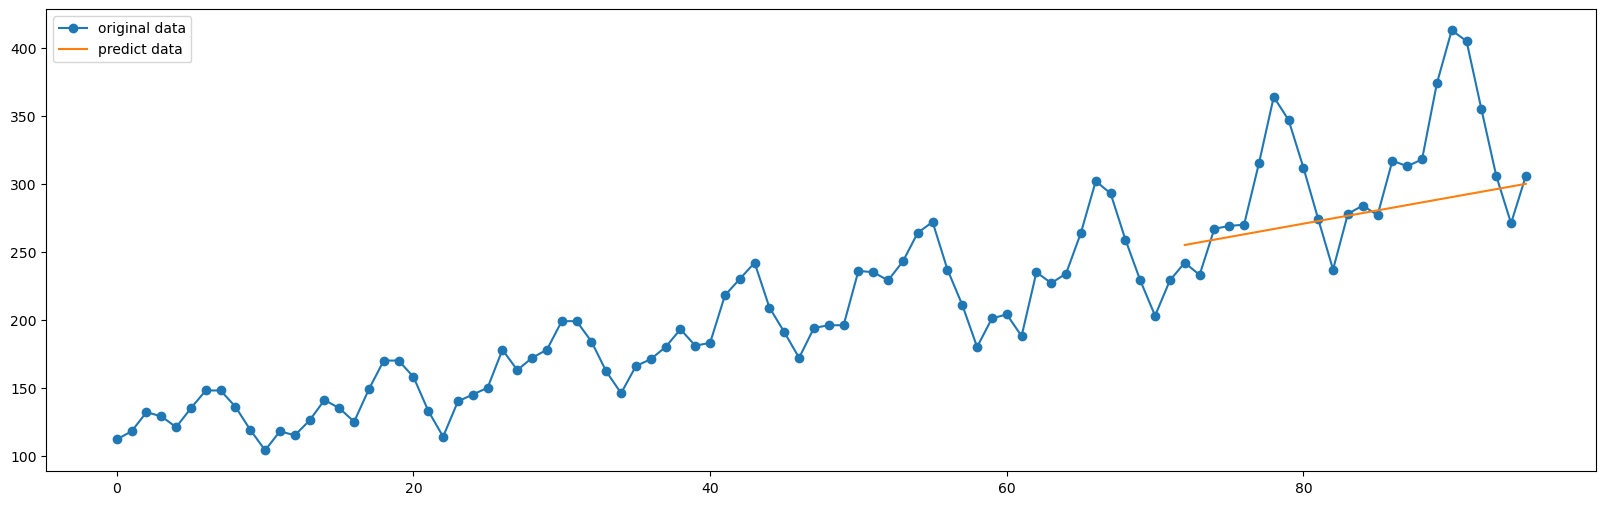

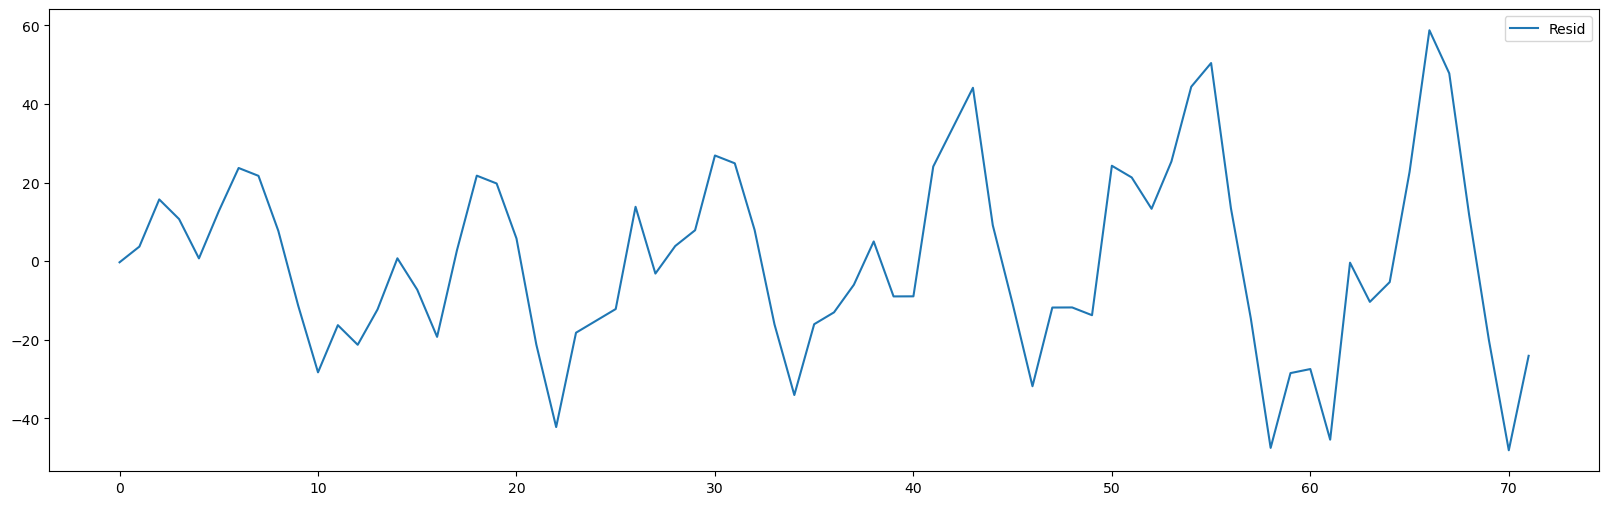

In [79]:
model_qua=smf.ols('Passengers~t+t_squared',data=train).fit()
qua_test_predict=pd.Series(model_qua.predict(pd.DataFrame(test[['t','t_squared']])))
mse_qua=mean_squared_error(test['Passengers'],qua_test_predict)
rmse_qua=np.sqrt(mse_qua)
mae_qua=mean_absolute_error(test['Passengers'],qua_test_predict)
mape_qua=mean_absolute_percentage_error(test['Passengers'],qua_test_predict)
plt.figure(figsize=(20,6))
df['Passengers'].plot(label='original data',marker='o')
qua_test_predict.plot(label='predict data')
plt.legend()
plt.show()
plt.figure(figsize=(20,6))
model_qua.resid.plot(label='Resid')
plt.legend()

In [80]:
result=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])

In [81]:
result['SIMPLE EXPONENTIAL SMOOTHING']=[mse_simple,rmse_simple,mae_simple,mape_simple]
result['DOUBLE EXPONENTIAL SMOOTHING WITH MULTIPLICATIVE TREND']=[mse_double_mul,rmse_double_mul,mae_double_mul,mape_double_mul]
result['DOUBLE EXPONENTIAL SMOOTHING WITH ADDITIVE TREND']=[mse_double1_add,rmse_double1_add,mae_double1_add,mape_double1_add]
result['TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY AND TREND =MUL']=[mse_triple1,rmse_triple1,mae_triple1,mape_triple1]
result['TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY AND TREND =ADD']=[mse_triple2,rmse_triple2,mae_triple2,mape_triple2]
result['TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY =MUL AND TREND =ADD']=[mse_triple3,rmse_triple3,mae_triple3,mape_triple3]
result['TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY =ADD AND TREND =MUL']=[mse_triple4,rmse_triple4,mae_triple4,mape_triple4]
result['ARIMA']=[mse_arima,rmse_arima,mae_arima,mape_arima]
result['LINEAR']=[mse_linear,rmse_linear,mae_linear,mape_linear]
result['EXPONENTIAL']=[mse_exp,rmse_exp,mae_exp,mape_exp]
result['QUADRATIC']=[mse_qua,rmse_qua,mae_qua,mape_qua]

In [82]:
result

,SIMPLE EXPONENTIAL SMOOTHING,DOUBLE EXPONENTIAL SMOOTHING WITH MULTIPLICATIVE TREND,DOUBLE EXPONENTIAL SMOOTHING WITH ADDITIVE TREND,TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY AND TREND =MUL,TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY AND TREND =ADD,TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY =MUL AND TREND =ADD,TRIPLE EXPONENTIAL SMOOTHING WITH SEASONALITY =ADD AND TREND =MUL,ARIMA,LINEAR,EXPONENTIAL,QUADRATIC
MSE,8301.625060,6796.998343,5062.761521,531.705182,2262.980603,1224.250720,2163.971820,6518.913566,2669.560833,92600.008737,2703.036672
RMSE,91.113254,82.443910,71.153085,23.058733,47.570796,34.989294,46.518511,80.739789,51.667793,304.302495,51.990736
MAE,77.125000,68.252977,56.865556,19.600330,39.883236,30.305259,38.849034,65.670883,37.008115,300.416927,37.339061
MAPE,0.233823,0.205466,0.169917,0.060350,0.120850,0.093683,0.117567,0.196629,0.109690,0.980923,0.110642


In [83]:
result.min(axis=1)

MSE     531.705182
RMSE     23.058733
MAE      19.600330
MAPE      0.060350
dtype: float64

### THE BEST MODEL IS TRIPLE EXPONENTIAL SMOOTHING WITH  TREND AND SEASONALITY =ADD

### RETRAIN THE MODEL WITH ENTIRE DATA

In [89]:
model_final=ExponentialSmoothing(df['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
final_predict=model_final.predict(start=len(df),end=test_len+len(df))

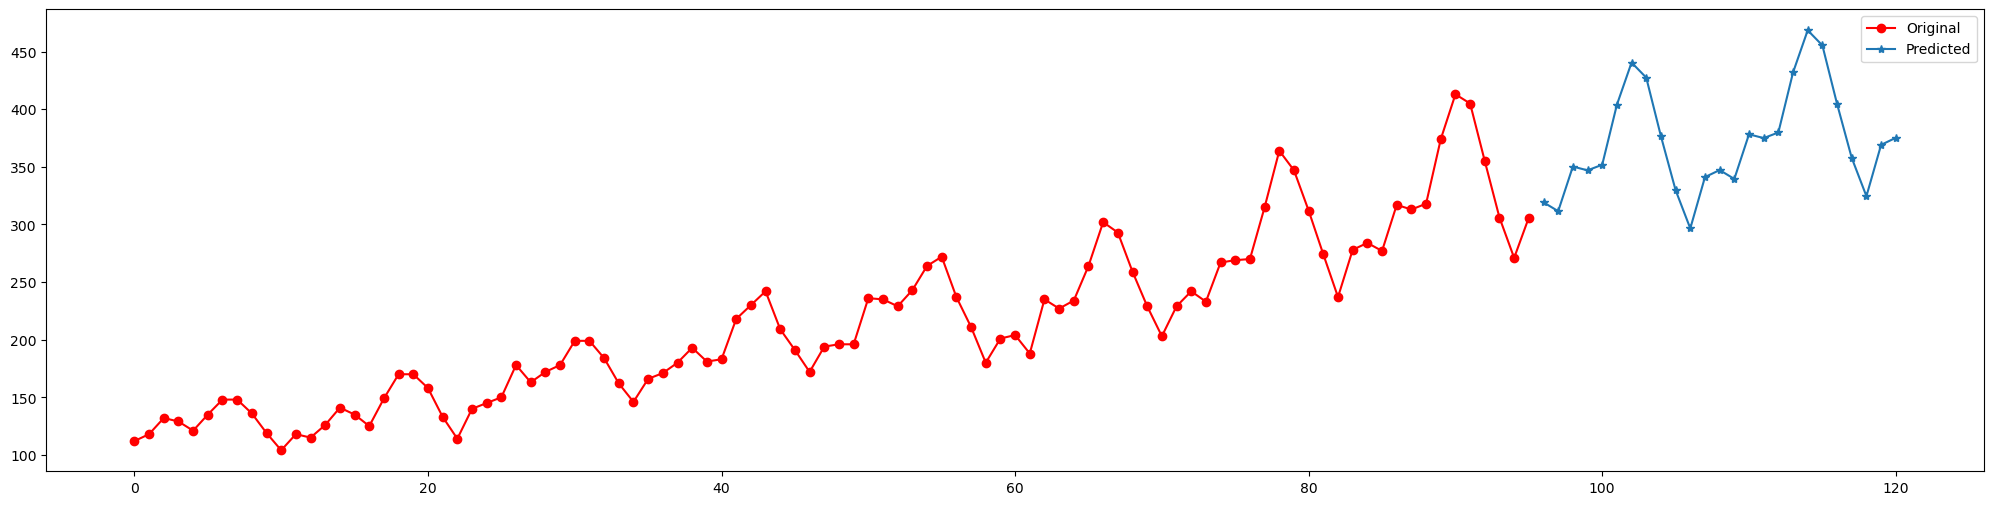

In [95]:
plt.figure(figsize=(25,6))
df['Passengers'].plot(label='Original',marker='o',color='red')
final_predict.plot(label='Predicted',marker='*')
plt.legend()
plt.show()